## 2101330_Talitha Syahla

### Di sini saya memilih dataset kepadatan_penduduk dan persen_penduduk_trampil_tik, karena menurut saya kedua dataset tersebut memiliki hubungan yang kuat untuk memprediksi kategori_pmi. Dari kepadatan_penduduk dapat di bandingkan yang memiliki persen_penduduk_trampil_tik. Dari hasil perbandingan tersebut, dapat di klasifikasi kan dengan dataset kategori_pmi.

In [29]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [30]:
df = pd.read_csv("E:\\semester 3\\data mining\\dataset_UAS\\kepadatan_penduduk.csv")
df.head(10)

,prov,tahun,kepadatan_penduduk
0,ACEH,2021,92
1,SUMATERA UTARA,2021,205
2,SUMATERA BARAT,2021,133
3,RIAU,2021,75
4,JAMBI,2021,72
5,SUMATERA SELATAN,2021,93
6,BENGKULU,2021,102
7,LAMPUNG,2021,262
8,KEP. BANGKA BELITUNG,2021,90
9,KEP. RIAU,2021,258


In [31]:
df1 = pd.read_csv("E:\\semester 3\\data mining\\dataset_UAS\\persen_penduduk_trampil_tik.csv")
df1.head(10)

,tahun,persen_penduduk_trampil_tik,prov
0,2021,60.21,ACEH
1,2021,67.41,SUMATERA UTARA
2,2021,68.00,SUMATERA BARAT
3,2021,70.69,RIAU
4,2021,64.47,JAMBI
5,2021,62.59,SUMATERA SELATAN
6,2021,62.10,BENGKULU
7,2021,65.76,LAMPUNG
8,2021,66.33,KEP. BANGKA BELITUNG
9,2021,89.06,KEP. RIAU


In [32]:
df2 = pd.read_csv("E:\\semester 3\\data mining\\dataset_UAS\\pmi.csv")
df2.head(10)

,prov,tahun,kategori_pmi
0,ACEH,2022,TINGGI
1,SUMATERA UTARA,2022,TINGGI
2,SUMATERA BARAT,2022,TINGGI
3,RIAU,2022,TINGGI
4,JAMBI,2022,TINGGI
5,SUMATERA SELATAN,2022,TINGGI
6,BENGKULU,2022,TINGGI
7,LAMPUNG,2022,TINGGI
8,KEP. BANGKA BELITUNG,2022,TINGGI
9,KEP. RIAU,2022,TINGGI


### Mengeksplorasi Dataset kepadatan_penduduk

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 280 entries, 0 to 279
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   prov                280 non-null    object
 1   tahun               280 non-null    int64 
 2   kepadatan_penduduk  280 non-null    object
dtypes: int64(1), object(2)
memory usage: 6.7+ KB


### Mengeksplorasi Dataset persen_penduduk_trampil_tik

In [34]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 245 entries, 0 to 244
Data columns (total 3 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   tahun                        245 non-null    int64  
 1   persen_penduduk_trampil_tik  245 non-null    float64
 2   prov                         245 non-null    object 
dtypes: float64(1), int64(1), object(1)
memory usage: 5.9+ KB


### Mengeksplorasi Dataset kategori_pmi

In [35]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   prov          442 non-null    object
 1   tahun         442 non-null    int64 
 2   kategori_pmi  442 non-null    object
dtypes: int64(1), object(2)
memory usage: 10.5+ KB


### Mengecek data NaN pada dataframe kepadatan_penduduk, persen_penduduk_trampil_tik, dan kategori_pmi

In [36]:
df.isna().sum()

prov                  0
tahun                 0
kepadatan_penduduk    0
dtype: int64

In [37]:
df1.isna().sum()

tahun                          0
persen_penduduk_trampil_tik    0
prov                           0
dtype: int64

In [38]:
df2.isna().sum()

prov            0
tahun           0
kategori_pmi    0
dtype: int64

##### Karena dari ketiga dataframe tersebut tidak ada data NaN di dalam nya, maka tidak perlu mengisi data NaN yang kosong

## Merge Ketiga Dataset

In [39]:
df3 = pd.merge(df, df1, how="left", on=["prov", "tahun"])
df3.head(10)

,prov,tahun,kepadatan_penduduk,persen_penduduk_trampil_tik
0,ACEH,2021,92,60.21
1,SUMATERA UTARA,2021,205,67.41
2,SUMATERA BARAT,2021,133,68.00
3,RIAU,2021,75,70.69
4,JAMBI,2021,72,64.47
5,SUMATERA SELATAN,2021,93,62.59
6,BENGKULU,2021,102,62.10
7,LAMPUNG,2021,262,65.76
8,KEP. BANGKA BELITUNG,2021,90,66.33
9,KEP. RIAU,2021,258,89.06


In [40]:
df4 = pd.merge(df3, df2, how="left", on=["prov", "tahun"])
df4.head(8)

,prov,tahun,kepadatan_penduduk,persen_penduduk_trampil_tik,kategori_pmi
0,ACEH,2021,92,60.21,TINGGI
1,SUMATERA UTARA,2021,205,67.41,TINGGI
2,SUMATERA BARAT,2021,133,68.00,TINGGI
3,RIAU,2021,75,70.69,TINGGI
4,JAMBI,2021,72,64.47,TINGGI
5,SUMATERA SELATAN,2021,93,62.59,TINGGI
6,BENGKULU,2021,102,62.10,TINGGI
7,LAMPUNG,2021,262,65.76,SEDANG


### Visualisasi Data

### Dari countplot di bawah, dapat dilihat bahwa kategori_pmi didominasi oleh tingkat sedang, dimana tingkat sedang ini < 70

<AxesSubplot:xlabel='kategori_pmi', ylabel='count'>

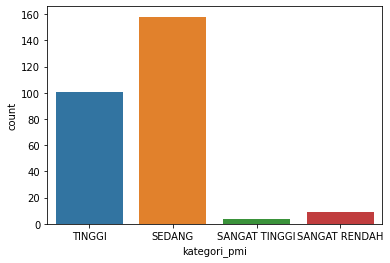

In [41]:
sns.countplot(x ="kategori_pmi", data=df4)

### Dari catplot di bawah, terlihat bahwa kategori_pmi memiliki tingkat yang senada pada tiap tahunnya dan pada setiap provinsi

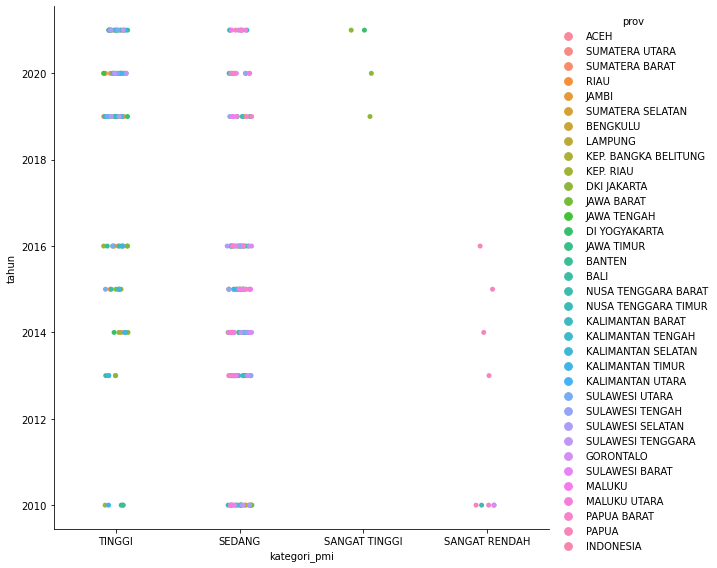

In [42]:
sns.catplot(x="kategori_pmi", y="tahun", hue="prov", data=df4, height=8)

### tingkat persen trampil TIK disetiap provinsi  memiliki beragam tingkat kategori_pmi, namun didominasi oleh tingkat tinggi

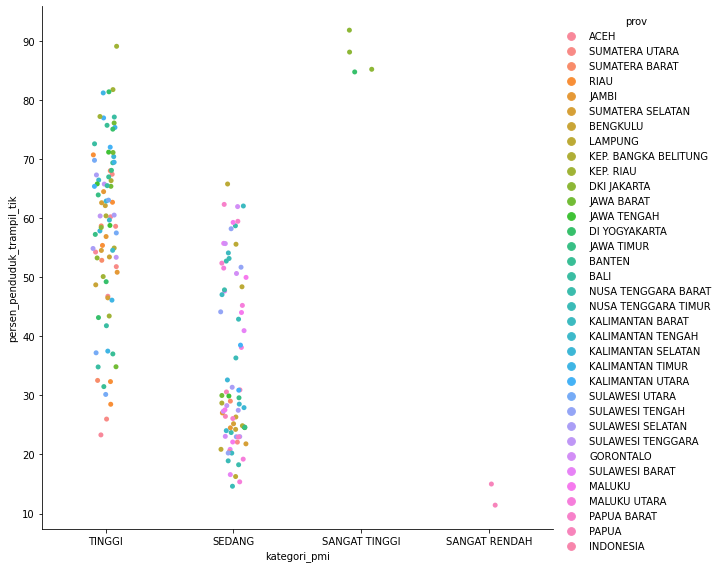

In [43]:
sns.catplot(x="kategori_pmi", y="persen_penduduk_trampil_tik", hue="prov", data=df4, height=8)

## Klasifikasi
### Import Library

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn import preprocessing
from sklearn.decomposition import PCA

In [45]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df4.kategori_pmi)
Y = le.transform(df4.kategori_pmi)

In [46]:
list(le.classes_)

['SANGAT RENDAH', 'SANGAT TINGGI', 'SEDANG', 'TINGGI', nan]

In [47]:
X = df4.drop(["kategori_pmi"],axis=1)

### Split Data

In [48]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=None)

### Metode Decision Tree

In [49]:
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

ValueError: could not convert string to float: 'KEP. RIAU'

### Metode Random Forest

In [50]:
clf = RandomForestClassifier(n_estimators=100, random_state=123)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

ValueError: could not convert string to float: 'KEP. RIAU'

### Metode XGBoost

In [51]:
import xgboost as xgb
from xgboost import XGBClassifier
clf=XGBClassifier(seed = 20, max_depth=10, learning_rate=0.1, n_estimators=100, 
                  objective='binary:logistic', booster='dart', colsample_bytree = 0.7, 
                  colsample_bylevel = 0.8, colsample_bynode = 0.8,
                 normalize_type = 'forest', sample_type = 'weighted', 
                  sampling_method = 'gradient_based')

clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)

acc = accuracy_score(Y_test, Y_pred)
print("Akurasi {}".format(acc))
print(classification_report(Y_test, Y_pred))

ModuleNotFoundError: No module named 'xgboost'